In [1]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.3.2-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.3.2-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HealthPrediction').getOrCreate()
from pyspark.ml.regression import LinearRegression
import matplotlib.pyplot as plt
df1 = spark.read.csv('Datasets/Population.csv',header=True,inferSchema=True)
df2 = spark.read.csv('Datasets/Nutrition_Physical_Activity_and_Obesity.csv',header=True,inferSchema=True)

In [2]:
df1.show()
df2.show()
df1.describe().show()
df2.describe().show()

+------+------+--------+-----+--------------------+-------------+-----------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------+----------+----------+----------+----------+----------+----------+----------+-----

+---------+-------+------------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+----------+--------------+--------------------------+-------------------+--------------------+----------------------+-----------+-----+-----------+--------------------+------+------------------+--------------+--------------------+-------+-------+----------+---------------+----------+-----------------------+--------------------+-------------------------+-----------------+
|YearStart|YearEnd|LocationAbbr|LocationDesc|          Datasource|               Class|               Topic|            Question|Data_Value_Unit|Data_Value_Type|Data_Value|Data_Value_Alt|Data_Value_Footnote_Symbol|Data_Value_Footnote|Low_Confidence_Limit|High_Confidence_Limit |Sample_Size|Total| Age(years)|           Education|Gender|            Income|Race/Ethnicity|         GeoLocation|ClassID|TopicID|QuestionID|DataValueTypeID|LocationID|StratificationCatego

+-------+-----------------+-----------------+-----------------+-----------------+------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+--------------------+--------------------+----------------

+-------+------------------+------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+------------------+------------------+--------------------------+--------------------+--------------------+----------------------+------------------+-----+-----------+--------------------+------+-----------------+---------------+--------------------+-------+-------+----------+---------------+------------------+-----------------------+-----------------+-------------------------+-----------------+
|summary|         YearStart|           YearEnd|LocationAbbr|LocationDesc|          Datasource|               Class|               Topic|            Question|Data_Value_Unit|Data_Value_Type|        Data_Value|    Data_Value_Alt|Data_Value_Footnote_Symbol| Data_Value_Footnote|Low_Confidence_Limit|High_Confidence_Limit |       Sample_Size|Total| Age(years)|           Education|Gender|           Income| Race/Ethn

In [3]:
# Print schema allows us to visualise the data structure at a high level. 
df1.printSchema()
df2.printSchema()

root
 |-- SUMLEV: integer (nullable = true)
 |-- REGION: string (nullable = true)
 |-- DIVISION: string (nullable = true)
 |-- STATE: integer (nullable = true)
 |-- LocationDesc: string (nullable = true)
 |-- CENSUS2010POP: integer (nullable = true)
 |-- ESTIMATESBASE2010: integer (nullable = true)
 |-- POPESTIMATE2010: integer (nullable = true)
 |-- POPESTIMATE2011: integer (nullable = true)
 |-- POPESTIMATE2012: integer (nullable = true)
 |-- POPESTIMATE2013: integer (nullable = true)
 |-- POPESTIMATE2014: integer (nullable = true)
 |-- POPESTIMATE2015: integer (nullable = true)
 |-- POPESTIMATE2016: integer (nullable = true)
 |-- POPESTIMATE2017: integer (nullable = true)
 |-- NPOPCHG_2010: integer (nullable = true)
 |-- NPOPCHG_2011: integer (nullable = true)
 |-- NPOPCHG_2012: integer (nullable = true)
 |-- NPOPCHG_2013: integer (nullable = true)
 |-- NPOPCHG_2014: integer (nullable = true)
 |-- NPOPCHG_2015: integer (nullable = true)
 |-- NPOPCHG_2016: integer (nullable = true)
 

In [4]:
df1.select('LocationDesc','POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016').describe().show()

+-------+------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+
|summary|LocationDesc|    POPESTIMATE2010|     POPESTIMATE2011|     POPESTIMATE2012|     POPESTIMATE2013|    POPESTIMATE2014|     POPESTIMATE2015|    POPESTIMATE2016|
+-------+------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+
|  count|          57|                 57|                  57|                  57|                  57|                 57|                  57|                 57|
|   mean|        null|1.634625943859649E7|1.6466869684210526E7|1.6589724631578946E7|1.6706957754385965E7| 1.68316219122807E7| 1.695776656140351E7|1.708112850877193E7|
| stddev|        null|4.444827223305536E7| 4.478996271767742E7| 4.513863938002119E7|4.5470555088969395E7|4.582674286492288E7|4.6189677773138836E7|4.654411977269719E7

In [5]:
# Visualise the data structure at a high level. 
df1.printSchema()
print(df1.head(1))

root
 |-- SUMLEV: integer (nullable = true)
 |-- REGION: string (nullable = true)
 |-- DIVISION: string (nullable = true)
 |-- STATE: integer (nullable = true)
 |-- LocationDesc: string (nullable = true)
 |-- CENSUS2010POP: integer (nullable = true)
 |-- ESTIMATESBASE2010: integer (nullable = true)
 |-- POPESTIMATE2010: integer (nullable = true)
 |-- POPESTIMATE2011: integer (nullable = true)
 |-- POPESTIMATE2012: integer (nullable = true)
 |-- POPESTIMATE2013: integer (nullable = true)
 |-- POPESTIMATE2014: integer (nullable = true)
 |-- POPESTIMATE2015: integer (nullable = true)
 |-- POPESTIMATE2016: integer (nullable = true)
 |-- POPESTIMATE2017: integer (nullable = true)
 |-- NPOPCHG_2010: integer (nullable = true)
 |-- NPOPCHG_2011: integer (nullable = true)
 |-- NPOPCHG_2012: integer (nullable = true)
 |-- NPOPCHG_2013: integer (nullable = true)
 |-- NPOPCHG_2014: integer (nullable = true)
 |-- NPOPCHG_2015: integer (nullable = true)
 |-- NPOPCHG_2016: integer (nullable = true)
 

In [6]:
new_merged_df = df1.join(df2, on=['LocationDesc'], how='inner')
new_merged_df.show()

+------------+------+------+--------+-----+-------------+-----------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------+----------+----------+----------+----------+----------+----------+----------+------------+

In [7]:
############################Data Exploration
import pandas as pd
data1=pd.read_csv('Datasets/Nutrition_Physical_Activity_and_Obesity.csv',index_col='LocationDesc')
data1.head()
data2=pd.read_csv('Datasets/Population.csv',index_col='LocationDesc')
data2.head()
Merged_Pandas=data1.merge(data2, on='LocationDesc', how='outer')
Merged_Pandas.head()

,YearStart,YearEnd,LocationAbbr,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,...,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017
LocationDesc,,,,,,,,,,,,,,,,,,,,,
Alabama,2011.0,2011.0,AL,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.0,...,-0.317205,-0.404473,0.788882,0.450741,0.939393,1.364296,0.694271,0.678575,0.558931,1.708218
Alabama,2011.0,2011.0,AL,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.3,...,-0.317205,-0.404473,0.788882,0.450741,0.939393,1.364296,0.694271,0.678575,0.558931,1.708218
Alabama,2011.0,2011.0,AL,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.8,...,-0.317205,-0.404473,0.788882,0.450741,0.939393,1.364296,0.694271,0.678575,0.558931,1.708218
Alabama,2011.0,2011.0,AL,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.6,...,-0.317205,-0.404473,0.788882,0.450741,0.939393,1.364296,0.694271,0.678575,0.558931,1.708218
Alabama,2011.0,2011.0,AL,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.8,...,-0.317205,-0.404473,0.788882,0.450741,0.939393,1.364296,0.694271,0.678575,0.558931,1.708218


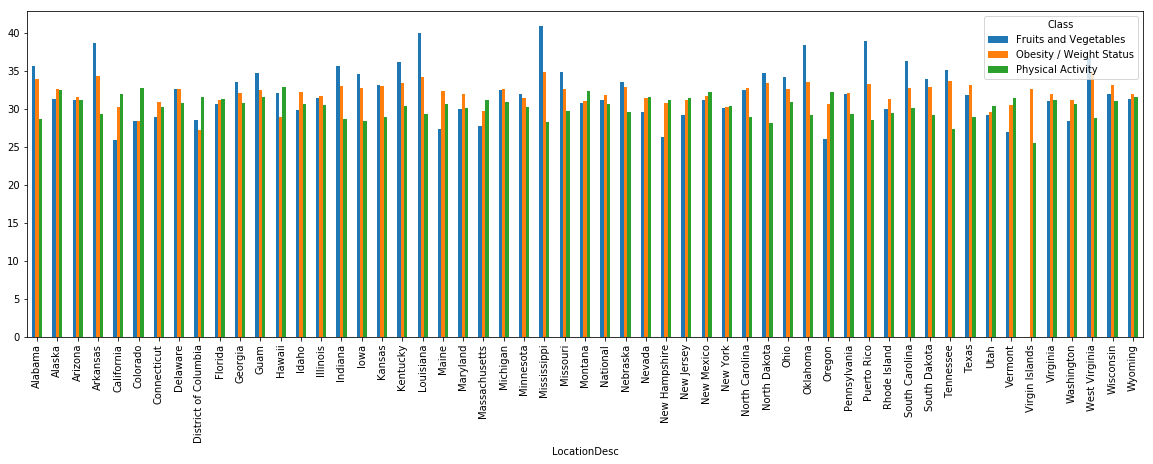

In [8]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
data12=data1.groupby(['LocationDesc','Class'])['Data_Value'].mean()
data12.unstack().plot(kind='bar',figsize=(20,6))

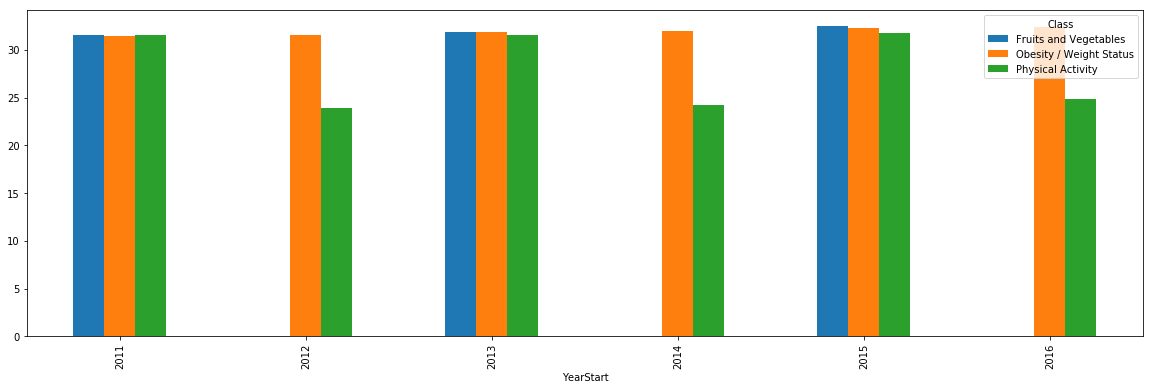

In [9]:
datayearplot=data1.groupby(['YearStart','Class'])['Data_Value'].mean()
datayearplot.unstack().plot(kind='bar',figsize=(20,6))

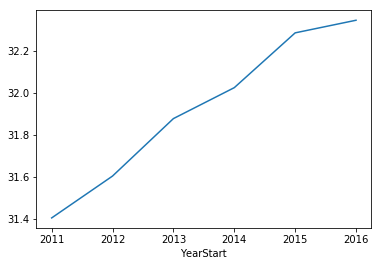

In [10]:
dataOS=data1[data1.Class == 'Obesity / Weight Status']
dataOS.groupby(['YearStart'])['Data_Value'].mean().plot(kind='line')


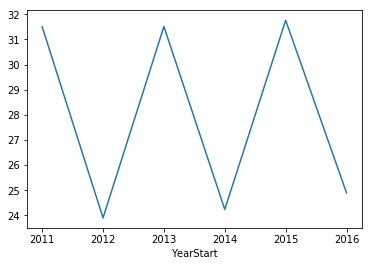

In [11]:
dataPA=data1[data1.Class == 'Physical Activity']
dataPA.groupby(['YearStart'])['Data_Value'].mean().plot(kind='line')

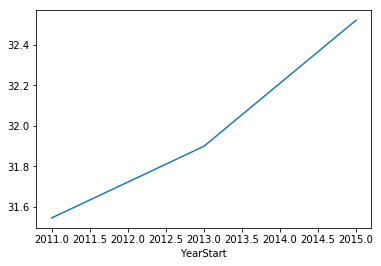

In [12]:
datafv=data1[data1.Class == 'Fruits and Vegetables']
datafv.groupby(['YearStart'])['Data_Value'].mean().plot(kind='line')

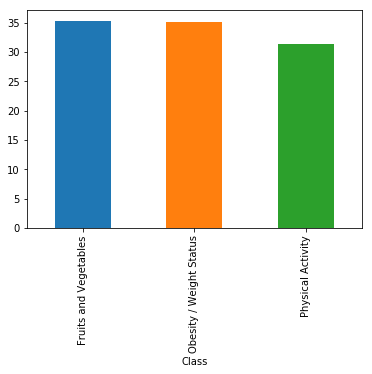

In [13]:
datafv=data1[data1.Stratification1 == 'Male']
datafv.groupby(['Class'])['Data_Value'].mean().plot(kind='bar')

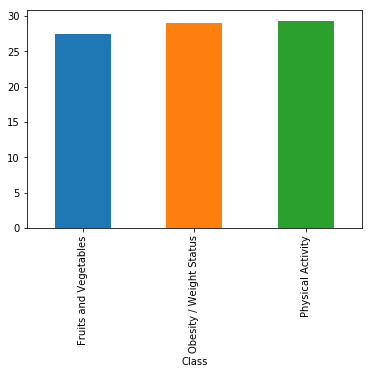

In [14]:
datafv=data1[data1.Stratification1 == 'Female']
datafv.groupby(['Class'])['Data_Value'].mean().plot(kind='bar')

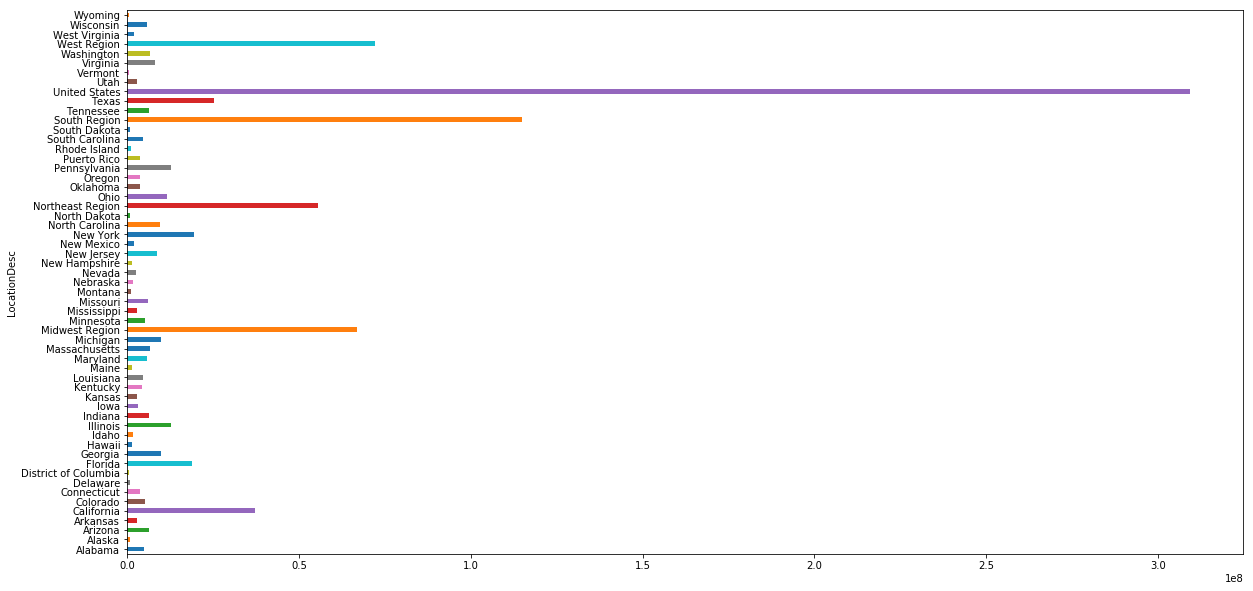

In [15]:
data2.groupby(['LocationDesc'])['POPESTIMATE2010'].mean().plot(kind='barh',figsize=(20,10))

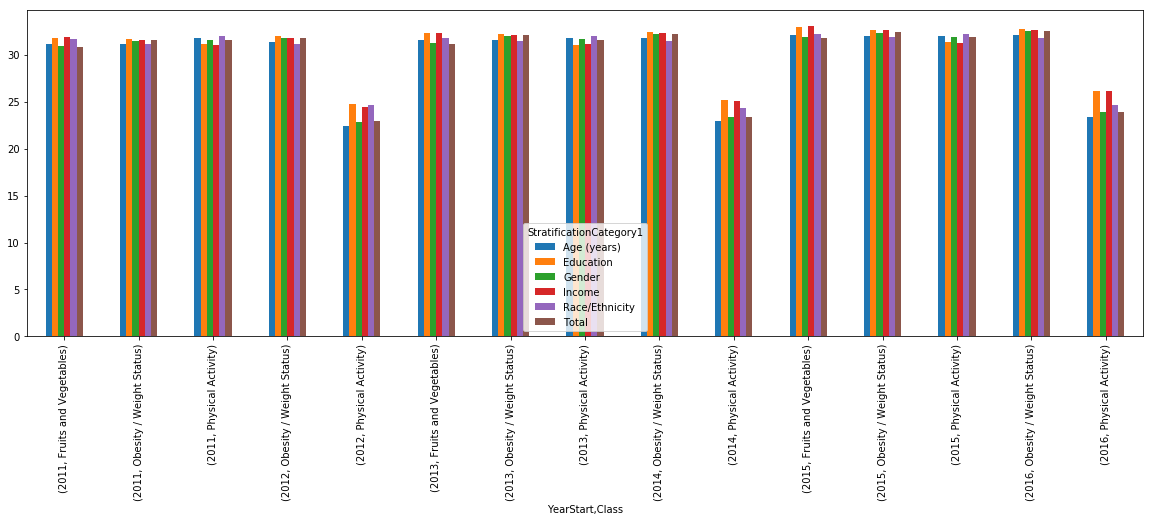

In [16]:
datayearplot=data1.groupby(['YearStart','Class','StratificationCategory1'])['Data_Value'].mean()
datayearplot.unstack().plot(kind='bar',figsize=(20,6))

In [17]:
#### Pandas Exploration ends here####
#################Data Quality-- Spark Code starts from here
df1.describe().show() ##########PopulationDataset

+-------+-----------------+-----------------+-----------------+-----------------+------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+--------------------+--------------------+----------------

In [18]:
df2.describe().show() ##########ObesityDataSet

+-------+------------------+------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+------------------+------------------+--------------------------+--------------------+--------------------+----------------------+------------------+-----+-----------+--------------------+------+-----------------+---------------+--------------------+-------+-------+----------+---------------+------------------+-----------------------+-----------------+-------------------------+-----------------+
|summary|         YearStart|           YearEnd|LocationAbbr|LocationDesc|          Datasource|               Class|               Topic|            Question|Data_Value_Unit|Data_Value_Type|        Data_Value|    Data_Value_Alt|Data_Value_Footnote_Symbol| Data_Value_Footnote|Low_Confidence_Limit|High_Confidence_Limit |       Sample_Size|Total| Age(years)|           Education|Gender|           Income| Race/Ethn

In [19]:
df2=df2.select('YearStart','LocationDesc','Class','Topic','Question','Data_Value','Data_Value_Footnote','Sample_Size',
          'StratificationCategory1','Stratification1').describe().show()

+-------+------------------+------------+--------------------+--------------------+--------------------+------------------+--------------------+------------------+-----------------------+-----------------+
|summary|         YearStart|LocationDesc|               Class|               Topic|            Question|        Data_Value| Data_Value_Footnote|       Sample_Size|StratificationCategory1|  Stratification1|
+-------+------------------+------------+--------------------+--------------------+--------------------+------------------+--------------------+------------------+-----------------------+-----------------+
|  count|             53392|       53392|               53392|               53392|               53392|             48346|                5046|             48346|                  53392|            53392|
|   mean|2013.2814653880732|        null|                null|                null|                null| 31.15668100773592|                null|3889.1928598022587|             

In [20]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.3.2-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.3.2-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HealthPrediction').getOrCreate()
from pyspark.ml.regression import LinearRegression
import matplotlib.pyplot as plt
df1 = spark.read.csv('Datasets/Population.csv',header=True,inferSchema=True)
df2 = spark.read.csv('Datasets/Nutrition_Physical_Activity_and_Obesity.csv',header=True,inferSchema=True)

##Fixing outliers and Extreme

from pyspark.sql.functions import stddev_pop,avg, broadcast
from pyspark.sql import functions as func

stats = (df2.groupBy("LocationDesc")
  .agg(
      func.stddev_pop("Data_Value").alias("sd"), 
      func.avg("Data_Value").alias("avg")))

df2.join(broadcast(stats), ["LocationDesc"])

(df2
    .join(func.broadcast(stats), ["LocationDesc"])
    .select("LocationDesc", "Data_Value", (df2.Data_Value - stats.avg) / stats.sd)).na.drop()
df2.show()

+---------+-------+------------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+----------+--------------+--------------------------+-------------------+--------------------+----------------------+-----------+-----+-----------+--------------------+------+------------------+--------------+--------------------+-------+-------+----------+---------------+----------+-----------------------+--------------------+-------------------------+-----------------+
|YearStart|YearEnd|LocationAbbr|LocationDesc|          Datasource|               Class|               Topic|            Question|Data_Value_Unit|Data_Value_Type|Data_Value|Data_Value_Alt|Data_Value_Footnote_Symbol|Data_Value_Footnote|Low_Confidence_Limit|High_Confidence_Limit |Sample_Size|Total| Age(years)|           Education|Gender|            Income|Race/Ethnicity|         GeoLocation|ClassID|TopicID|QuestionID|DataValueTypeID|LocationID|StratificationCatego

In [21]:
## Dropping null values
missing_field_df2=df2.na.drop(subset="Data_Value")

missing_field_df2.show()
print("Total Data Points: ", missing_field_df2.count())


+---------+-------+------------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+----------+--------------+--------------------------+-------------------+--------------------+----------------------+-----------+-----+-----------+--------------------+------+------------------+--------------+--------------------+-------+-------+----------+---------------+----------+-----------------------+--------------------+-------------------------+-----------------+
|YearStart|YearEnd|LocationAbbr|LocationDesc|          Datasource|               Class|               Topic|            Question|Data_Value_Unit|Data_Value_Type|Data_Value|Data_Value_Alt|Data_Value_Footnote_Symbol|Data_Value_Footnote|Low_Confidence_Limit|High_Confidence_Limit |Sample_Size|Total| Age(years)|           Education|Gender|            Income|Race/Ethnicity|         GeoLocation|ClassID|TopicID|QuestionID|DataValueTypeID|LocationID|StratificationCatego

Total Data Points:  48346


In [22]:
## Dropping null values
missing_field_df3=missing_field_df2.na.drop(subset="Sample_Size")

missing_field_df3.show()
print("Total Data Points: ", missing_field_df3.count())

+---------+-------+------------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+----------+--------------+--------------------------+-------------------+--------------------+----------------------+-----------+-----+-----------+--------------------+------+------------------+--------------+--------------------+-------+-------+----------+---------------+----------+-----------------------+--------------------+-------------------------+-----------------+
|YearStart|YearEnd|LocationAbbr|LocationDesc|          Datasource|               Class|               Topic|            Question|Data_Value_Unit|Data_Value_Type|Data_Value|Data_Value_Alt|Data_Value_Footnote_Symbol|Data_Value_Footnote|Low_Confidence_Limit|High_Confidence_Limit |Sample_Size|Total| Age(years)|           Education|Gender|            Income|Race/Ethnicity|         GeoLocation|ClassID|TopicID|QuestionID|DataValueTypeID|LocationID|StratificationCatego

Total Data Points:  48346


In [23]:
####Filling null values with N/A
filled_df= missing_field_df3.na.fill('N/A',subset=['Data_Value_Footnote','Sample_Size','Age(years)','Education','Gender',         
                                                   'Income','Race/Ethnicity',
                                                   'GeoLocation','ClassID','TopicID','QuestionID','DataValueTypeID','LocationID',
          'StratificationCategory1','Stratification1'])
filled_df.show()

+---------+-------+------------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+----------+--------------+--------------------------+-------------------+--------------------+----------------------+-----------+-----+-----------+--------------------+------+------------------+--------------+--------------------+-------+-------+----------+---------------+----------+-----------------------+--------------------+-------------------------+-----------------+
|YearStart|YearEnd|LocationAbbr|LocationDesc|          Datasource|               Class|               Topic|            Question|Data_Value_Unit|Data_Value_Type|Data_Value|Data_Value_Alt|Data_Value_Footnote_Symbol|Data_Value_Footnote|Low_Confidence_Limit|High_Confidence_Limit |Sample_Size|Total| Age(years)|           Education|Gender|            Income|Race/Ethnicity|         GeoLocation|ClassID|TopicID|QuestionID|DataValueTypeID|LocationID|StratificationCatego

In [24]:
filled_df.describe().show()

+-------+------------------+------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+------------------+------------------+--------------------------+-------------------+--------------------+----------------------+------------------+-----+----------+--------------------+------+-----------------+---------------+--------------------+-------+-------+----------+---------------+------------------+-----------------------+-----------------+-------------------------+-----------------+
|summary|         YearStart|           YearEnd|LocationAbbr|LocationDesc|          Datasource|               Class|               Topic|            Question|Data_Value_Unit|Data_Value_Type|        Data_Value|    Data_Value_Alt|Data_Value_Footnote_Symbol|Data_Value_Footnote|Low_Confidence_Limit|High_Confidence_Limit |       Sample_Size|Total|Age(years)|           Education|Gender|           Income| Race/Ethnicit

In [25]:
## 3.3 Construct the Data
##Add "Data_Availability" column

from pyspark.sql import functions as F
df_with_DataAvail=filled_df.withColumn("DataAvailability", F.when((F.col("Data_Value_Footnote")=="N/A"),"False")\
                                      .otherwise("True"))
df_with_DataAvail.show()

+---------+-------+------------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+----------+--------------+--------------------------+-------------------+--------------------+----------------------+-----------+-----+-----------+--------------------+------+------------------+--------------+--------------------+-------+-------+----------+---------------+----------+-----------------------+--------------------+-------------------------+-----------------+----------------+
|YearStart|YearEnd|LocationAbbr|LocationDesc|          Datasource|               Class|               Topic|            Question|Data_Value_Unit|Data_Value_Type|Data_Value|Data_Value_Alt|Data_Value_Footnote_Symbol|Data_Value_Footnote|Low_Confidence_Limit|High_Confidence_Limit |Sample_Size|Total| Age(years)|           Education|Gender|            Income|Race/Ethnicity|         GeoLocation|ClassID|TopicID|QuestionID|DataValueTypeID|LocationID|Str

In [26]:
## 3.4 Integrate varous datasources

MergedSparkData=df_with_DataAvail.join(df1,on=['LocationDesc'],how='inner')
MergedSparkData.show()

+------------+---------+-------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+----------+--------------+--------------------------+-------------------+--------------------+----------------------+-----------+-----+-----------+--------------------+------+------------------+--------------+--------------------+-------+-------+----------+---------------+----------+-----------------------+--------------------+-------------------------+-----------------+----------------+------+------+--------+-----+-------------+-----------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+--

In [27]:
## 3.5 Format the Data
from pyspark.sql import functions as F

MergedSparkData1=MergedSparkData.withColumn("Population",
                                            F.when((F.col("YearStart") == 2011) , F.col("POPESTIMATE2011"))\
                                            .when((F.col("YearStart") == 2012) , F.col("POPESTIMATE2012"))\
                                            .when((F.col("YearStart") == 2013) , F.col("POPESTIMATE2013"))\
                                            .when((F.col("YearStart") == 2014) , F.col("POPESTIMATE2014"))\
                                            .when((F.col("YearStart") == 2015) , F.col("POPESTIMATE2015"))\
                                            .when((F.col("YearStart") == 2016),  F.col("POPESTIMATE2016"))\
                                            .otherwise(0))
MergedSparkData1.show()

+------------+---------+-------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+----------+--------------+--------------------------+-------------------+--------------------+----------------------+-----------+-----+-----------+--------------------+------+------------------+--------------+--------------------+-------+-------+----------+---------------+----------+-----------------------+--------------------+-------------------------+-----------------+----------------+------+------+--------+-----+-------------+-----------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+--

In [28]:
### 3.5 Format the Data: Sorting
import pyspark.sql.types as T
F.col("Population").cast('int')
F.col('Data_Value').cast('Float')
MergedSparkData1=MergedSparkData1.orderBy('LocationDesc')
MergedSparkData1.show()


+------------+---------+-------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+----------+--------------+--------------------------+-------------------+--------------------+----------------------+-----------+-----+-----------+--------------------+------+------------------+------------------+--------------------+-------+-------+----------+---------------+----------+-----------------------+--------------------+-------------------------+-----------------+----------------+------+------+--------+-----+-------------+-----------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+---------

In [29]:

###4.1 Reduce the data
MergedSparkData1.show()

+------------+---------+-------+------------+--------------------+--------------------+--------------------+--------------------+---------------+---------------+----------+--------------+--------------------------+-------------------+--------------------+----------------------+-----------+-----+-----------+--------------------+------+------------------+------------------+--------------------+-------+-------+----------+---------------+----------+-----------------------+--------------------+-------------------------+-----------------+----------------+------+------+--------+-----+-------------+-----------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+---------

In [30]:
###4.1 Calculating Feature importance -- Random Forest Regression

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
import pandas as pd
from pyspark.sql.functions import *
features = ["YearStart","Sample_Size","Population"]  

lr_data = MergedSparkData1.select(col("Data_Value").alias("label"), *features)  
lr_data.printSchema()  
vector = VectorAssembler(inputCols=features, outputCol="features")
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
rfr = RandomForestRegressor(labelCol="label", featuresCol="scaled_features")

stages = [vector, scaler, rfr]

pipe = Pipeline(stages=stages)
estimatorParam = ParamGridBuilder() \
.addGrid(rfr.maxDepth, [4, 6, 8]) \
.addGrid(rfr.maxBins, [5, 10, 20, 40]) \
.addGrid(rfr.impurity, ["variance"]) \
.build()

evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
crossval = CrossValidator(estimator=pipe,
                         estimatorParamMaps=estimatorParam,
                         evaluator=evaluator,
                         numFolds=3)

cvmodel = crossval.fit(lr_data)
model = pd.DataFrame(cvmodel.bestModel.stages[-1].featureImportances.toArray(), columns=["values"])
features_col = pd.Series(features)
model["features"] = features_col
model

root
 |-- label: double (nullable = true)
 |-- YearStart: integer (nullable = true)
 |-- Sample_Size: integer (nullable = true)
 |-- Population: integer (nullable = true)



,values,features
0,0.616738,YearStart
1,0.218828,Sample_Size
2,0.164434,Population


In [31]:

###4.1 Reduce the data
MergedSparkData1=MergedSparkData1.select('LocationDesc','YearStart','Class','Data_Value','Sample_Size','Question',
                                         'StratificationCategory1','Stratification1','DataAvailability','Population')
MergedSparkData1.show()

+------------+---------+--------------------+----------+-----------+--------------------+-----------------------+--------------------+----------------+----------+
|LocationDesc|YearStart|               Class|Data_Value|Sample_Size|            Question|StratificationCategory1|     Stratification1|DataAvailability|Population|
+------------+---------+--------------------+----------+-----------+--------------------+-----------------------+--------------------+----------------+----------+
|     Alabama|     2015|Fruits and Vegeta...|      41.9|         50|Percent of adults...|         Race/Ethnicity|               Other|           False|   4850858|
|     Alabama|     2015|Fruits and Vegeta...|      34.2|       1207|Percent of adults...|                 Income|   $15,000 - $24,999|           False|   4850858|
|     Alabama|     2015|Fruits and Vegeta...|      47.4|       1768|Percent of adults...|         Race/Ethnicity|  Non-Hispanic Black|           False|   4850858|
|     Alabama|     201

In [32]:
## Combine the features into one vector
# Import VectorAssembler and Vectors
from pyspark.ml.feature import VectorAssembler,StringIndexer,OneHotEncoderEstimator,VectorIndexer
from pyspark.ml.linalg import DenseVector

# The input columns are the feature column names, and the output column is the new column. 
#vector_assembler = VectorAssembler(inputCols = ["YearStart"]  , outputCol = 'features')

from pyspark.ml import Pipeline

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(MergedSparkData1) for column in list(set(MergedSparkData1.columns)-set(['date'])) ]
pipeline = Pipeline(stages=indexers)
model = pipeline.fit(MergedSparkData1)
vector_output = model.transform(MergedSparkData1)

# PrintSchema
vector_output.printSchema()

# features column is a DenseVector that combines the various features as expected.
vector_output.head(1)




root
 |-- LocationDesc: string (nullable = true)
 |-- YearStart: integer (nullable = true)
 |-- Class: string (nullable = true)
 |-- Data_Value: double (nullable = true)
 |-- Sample_Size: integer (nullable = true)
 |-- Question: string (nullable = true)
 |-- StratificationCategory1: string (nullable = false)
 |-- Stratification1: string (nullable = false)
 |-- DataAvailability: string (nullable = false)
 |-- Population: integer (nullable = true)
 |-- Question_index: double (nullable = false)
 |-- Data_Value_index: double (nullable = false)
 |-- DataAvailability_index: double (nullable = false)
 |-- Class_index: double (nullable = false)
 |-- YearStart_index: double (nullable = false)
 |-- LocationDesc_index: double (nullable = false)
 |-- Stratification1_index: double (nullable = false)
 |-- StratificationCategory1_index: double (nullable = false)
 |-- Sample_Size_index: double (nullable = false)
 |-- Population_index: double (nullable = false)



[Row(LocationDesc='Alabama', YearStart=2011, Class='Obesity / Weight Status', Data_Value=32.0, Sample_Size=7304, Question='Percent of adults aged 18 years and older who have obesity', StratificationCategory1='Total', Stratification1='Total', DataAvailability='False', Population=4798649, Question_index=1.0, Data_Value_index=80.0, DataAvailability_index=0.0, Class_index=1.0, YearStart_index=1.0, LocationDesc_index=36.0, Stratification1_index=7.0, StratificationCategory1_index=5.0, Sample_Size_index=3172.0, Population_index=104.0)]

In [33]:
## 7.1 Train and test the data
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import DenseVector
from pyspark.ml.linalg import Vectors

vector_assembler = VectorAssembler(inputCols = ['YearStart_index','StratificationCategory1_index','Data_Value_index','Question_index',
                      'DataAvailability_index','Population_index','Sample_Size_index','Stratification1_index','LocationDesc_index','Class_index'] ,
                                   outputCol = 'features')

vector_output1 = vector_assembler.transform(vector_output)

vector_output1.head(1)


train_data,test_data = vector_output1.randomSplit([0.7,0.3])

# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+------------+------------------+--------------------+------------------+------------------+--------------------+-----------------------+-----------------+----------------+-----------------+------------------+------------------+----------------------+------------------+------------------+------------------+---------------------+-----------------------------+------------------+------------------+
|summary|LocationDesc|         YearStart|               Class|        Data_Value|       Sample_Size|            Question|StratificationCategory1|  Stratification1|DataAvailability|       Population|    Question_index|  Data_Value_index|DataAvailability_index|       Class_index|   YearStart_index|LocationDesc_index|Stratification1_index|StratificationCategory1_index| Sample_Size_index|  Population_index|
+-------+------------+------------------+--------------------+------------------+------------------+--------------------+-----------------------+-----------------+----------------+------

In [34]:
# Importing the LinearRegression package.
from pyspark.ml.regression import LinearRegression

# Instantiate the instance.
#lr = LinearRegression(featuresCol='features', labelCol='Data_Value')


lr = LinearRegression(featuresCol='features',
                      labelCol='Data_Value')


# Fit the training data.

##lr_model = lr.fit(train_data['YearStart'],train_data['Data_Value'])
# Fit the training data.
lr_model = lr.fit(train_data)

# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients))

# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")

# Summarise the model and print out some evaluation metrics.
training_summary = lr_model.summary

# Print RMSE. 
print("RMSE: " + str(training_summary.rootMeanSquaredError))

# Print R2.
print("R2: " + str(training_summary.r2))



Coefficients: [-0.35937568110398377,0.16632559370371208,0.020379108371572384,-0.5542301790441408,0.0,-0.011733493419826664,-0.0002454924696598562,-0.03967321192684735,0.03283378458113174,0.764209867190375]
Intercept: 30.984855382080394

RMSE: 9.899637121840296
R2: 0.07177396460875829


In [35]:
# Let's evaluate the model against the test data.
test_results = lr_model.evaluate(test_data)

# And print the RMSE/R2. As expected, our RMSE and R2 are slightly worse when applying the testing set.
print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
print("R2 on test data: " + str(test_results.r2))

RMSE on test data: 9.857846319609543
R2 on test data: 0.08285401243595403


/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


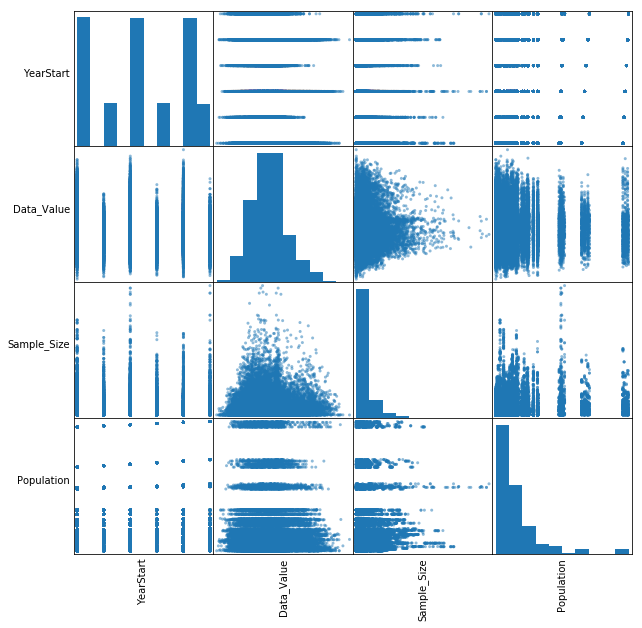

In [36]:
import pandas as pd
numeric_features = [t[0] for t in MergedSparkData1.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = MergedSparkData1.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [37]:
### Regression Algorithm
from pyspark.ml.feature import VectorAssembler,StringIndexer
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(MergedSparkData1) for column in list(set(MergedSparkData1.columns)-set(['date'])) ]
pipeline = Pipeline(stages=indexers)
model = pipeline.fit(MergedSparkData1)
vector_output = model.transform(MergedSparkData1)

vectorAssembler = VectorAssembler(inputCols = ['YearStart','Sample_Size','LocationDesc_index','Class_index','Question_index',
                                               'Stratification1_index','StratificationCategory1_index'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(vector_output)
vhouse_df = vhouse_df.select(['features', 'Data_Value'])
vhouse_df.show(3)

+--------------------+----------+
|            features|Data_Value|
+--------------------+----------+
|[2011.0,7304.0,36...|      32.0|
|[2011.0,2581.0,36...|      32.3|
|[2011.0,4723.0,36...|      31.8|
+--------------------+----------+
only showing top 3 rows



In [38]:
### Linear Regression Algorithm-- extension to the main
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Data_Value', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.0,-1.780541416176862e-05,0.0,0.7361602168356276,0.0,0.0,0.0]
Intercept: 30.692683831253685
RMSE: 10.313804
r2: 0.005517


In [39]:
### Decision Tree Algorithm
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Data_Value',maxBins=52)
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="Data_Value", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
dt_predictions.select('prediction', 'Data_Value', 'features').show(15)


Root Mean Squared Error (RMSE) on test data = 5.41614
+------------------+----------+--------------------+
|        prediction|Data_Value|            features|
+------------------+----------+--------------------+
| 48.83939393939394|      43.1|[2011.0,55.0,36.0...|
| 23.61430773974716|      22.1|[2011.0,55.0,36.0...|
| 23.61430773974716|      20.1|[2011.0,58.0,36.0...|
| 19.06237006237006|      15.3|[2011.0,63.0,36.0...|
| 47.95521885521886|      41.6|[2011.0,64.0,36.0...|
| 33.45630000000002|      20.6|[2011.0,65.0,36.0...|
|30.681602564102565|      24.4|[2011.0,106.0,36....|
|39.200467289719626|      37.9|[2011.0,107.0,36....|
|28.877225672877845|      11.3|[2011.0,108.0,36....|
|39.600671140939596|      35.4|[2011.0,110.0,36....|
|28.228319162851538|      21.4|[2011.0,113.0,36....|
|28.877225672877845|      42.5|[2011.0,115.0,36....|
| 47.95521885521886|      45.0|[2011.0,355.0,36....|
| 23.61430773974716|      31.4|[2011.0,361.0,36....|
|28.228319162851538|      41.6|[2011.0,365.0,

In [40]:
### GradientBoost Regression Algorithm

from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'Data_Value', maxIter=10,maxBins=52)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'Data_Value', 'features').show(15)

+------------------+----------+--------------------+
|        prediction|Data_Value|            features|
+------------------+----------+--------------------+
|46.993938120279125|      43.1|[2011.0,55.0,36.0...|
|23.718230537748713|      22.1|[2011.0,55.0,36.0...|
|24.430041307896836|      20.1|[2011.0,58.0,36.0...|
| 17.23670379872151|      15.3|[2011.0,63.0,36.0...|
|  48.2526257209324|      41.6|[2011.0,64.0,36.0...|
|31.370206441910334|      20.6|[2011.0,65.0,36.0...|
|27.035710724938106|      24.4|[2011.0,106.0,36....|
| 36.20717719856763|      37.9|[2011.0,107.0,36....|
|28.417031340807338|      11.3|[2011.0,108.0,36....|
| 38.90894382912622|      35.4|[2011.0,110.0,36....|
|24.836262995540572|      21.4|[2011.0,113.0,36....|
| 28.88633615265031|      42.5|[2011.0,115.0,36....|
|46.318782107527284|      45.0|[2011.0,355.0,36....|
|23.957631777361595|      31.4|[2011.0,361.0,36....|
|29.860880250433326|      41.6|[2011.0,365.0,36....|
+------------------+----------+---------------

In [41]:
### GradientBoost Regression Algorithm
gbt_evaluator = RegressionEvaluator(
    labelCol="Data_Value", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 4.42327


In [42]:
###Linear regression testing
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 10.1218


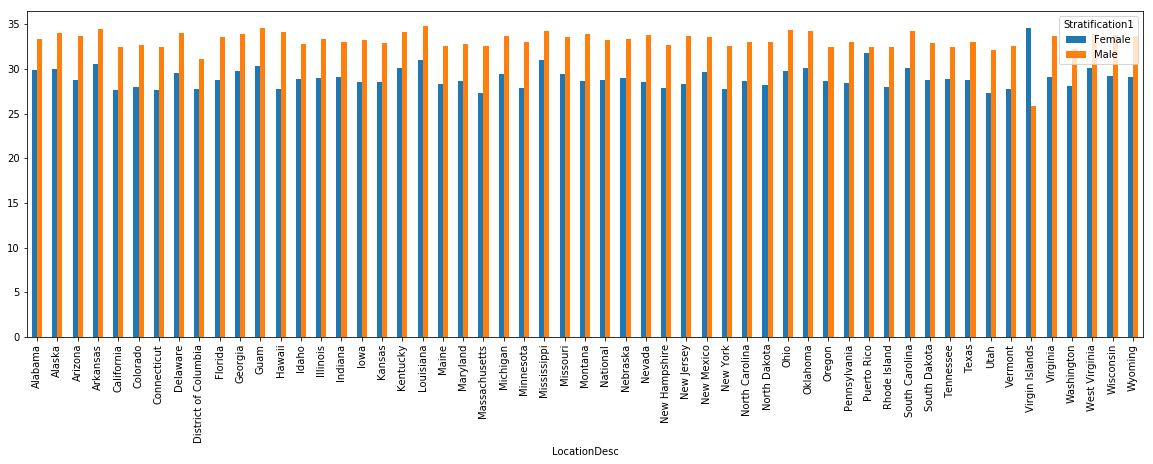

In [43]:
## Plot Prediction against Data_Value
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
datafv=data1[data1.StratificationCategory1 == 'Gender']
data12=datafv.groupby(['LocationDesc','Stratification1'])['Data_Value'].mean()
data12.unstack().plot(kind='bar',figsize=(20,6))